---

<h1 style="text-align: center;font-size: 30px; color: #013b86;">Simple Churn prediction with Deep-Learning VS XGBoost</h1>

---

<center><img style="width: 700px;" src="https://i.ibb.co/jWvLTtM/vs-image-2.jpg"></center>

---
<i>Source: Base image from Google, after edit image upload in imgbb</i>

# Introduction

This notebook is just about a simple comparison of artificial neural networks vs xgboost. For this comparison I use the churn-modelling data set.

Here we are not doing detailed EDA. Which is not the goal for here. All that is needed to complete this process is to do a simple EDA.

Deep learning is best for long information through. But we want to see. What do they do in such a situation.

Hope u like this simple comparison.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/churn-modelling/Churn_Modelling.csv
/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


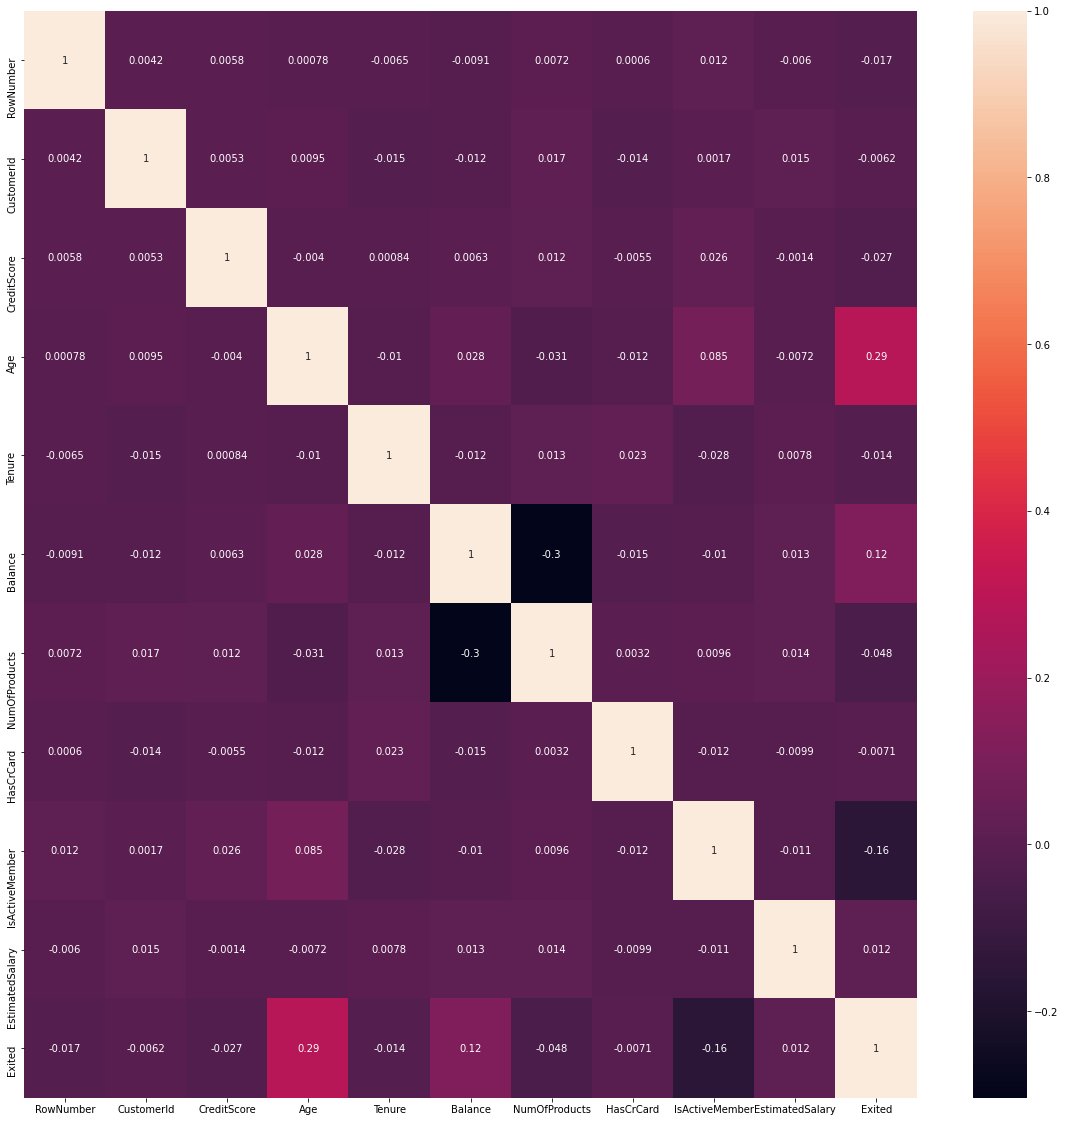

In [3]:
plt.figure(figsize=(20,20))
churn_corr = dataset.corr()
churn_corr_top = churn_corr.index
sns.heatmap(dataset[churn_corr_top].corr(), annot=True)

In [4]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
geography = pd.get_dummies(dataset['Geography'], drop_first=True)
gender = pd.get_dummies(dataset['Gender'], drop_first=True)
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [7]:
X = pd.concat([X, geography, gender], axis=1)

In [8]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Artificial Neural Network

---

<center><img style="width: 700px;" src="https://www.mdpi.com/genes/genes-10-00553/article_deploy/html/images/genes-10-00553-g001.png"></center>

---


### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

### Importing the Keras libraries and packages

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Using TensorFlow backend.


### Initialising the ANN

In [15]:
classifier = Sequential()

### Building Deep layer 

In [16]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))
classifier.add(Dropout(0.1))

In [17]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.1))

In [18]:
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [19]:
# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.7387 - accuracy: 0.5592 - val_loss: 0.6024 - val_accuracy: 0.6903
Epoch 2/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5714 - accuracy: 0.7513 - val_loss: 0.5374 - val_accuracy: 0.7948
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.7916 - val_loss: 0.5160 - val_accuracy: 0.8005
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5142 - accuracy: 0.7977 - val_loss: 0.5034 - val_accuracy: 0.8012
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4985 - accuracy: 0.7996 - val_loss: 0.4940 - val_accuracy: 0.8016
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4948 - accuracy: 0.7988 - val_loss: 0.4862 - val_accuracy: 0.8016
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4791 - accuracy: 0.8063 - val_loss: 0.4788 - val_accuracy: 0.8016


### list all data in history

In [21]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


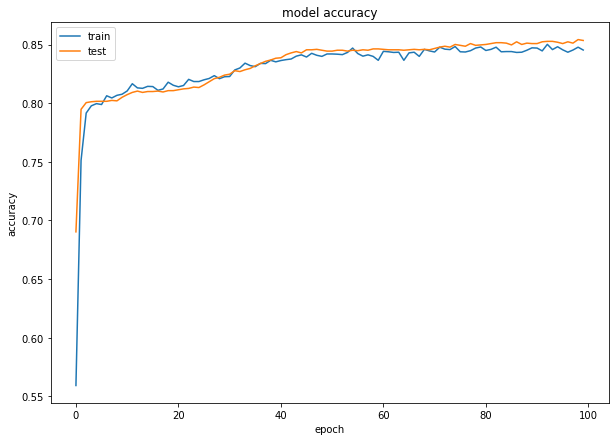

In [22]:
# summarize history for accuracy
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

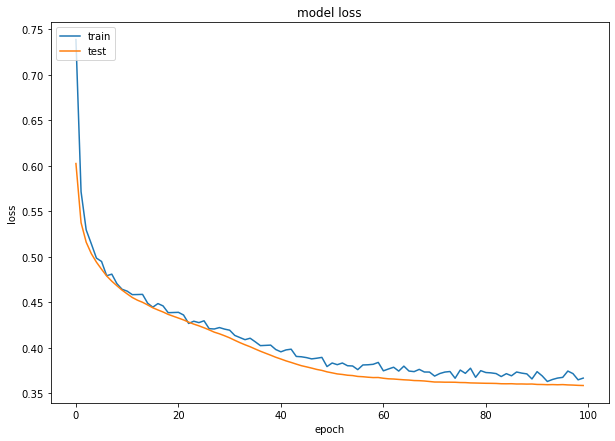

In [23]:
# summarize history for loss
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Part 3 - Making the predictions and evaluating the model

In [24]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
cm

array([[1528,   67],
       [ 210,  195]])

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [28]:
score

0.8615

## Hyper parameter Tuning for ANN

In [29]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [31]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i == 0:
            model.add(Dense(nodes, kernel_initializer = 'he_uniform',activation=activation,input_dim = X_train.shape[1]))
            model.add(Dropout(0.1))
        else:
            model.add(Dense(nodes, kernel_initializer = 'he_uniform',activation=activation))
            model.add(Dropout(0.1))

    # Adding the output layer
    model.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
                           
    # Compiling the ANN
    model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [32]:
model = KerasClassifier(build_fn=create_model, verbose=0)
layers = [(6, 3, 3), (10, 10), (45, 30, 15)]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)
grid_result = grid.fit(X_train, y_train)

In [33]:
[grid_result.best_score_,grid_result.best_params_]

[0.8408750057220459,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': (45, 30, 15)}]

# XGBoost

---

<center><img style="width: 700px;" src="https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png"></center>

---

In [34]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [35]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Hyper Parameter Optimization for xgboost

In [36]:
params = {
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "learning_rate": [0.5, 0.10, 0.15, 0.20, 0.25, 0.30],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

In [37]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [38]:
xgb_init = xgboost.XGBClassifier()

In [39]:
random_cv = RandomizedSearchCV(xgb_init, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=1, cv=5, verbose=3)

In [40]:
random_cv.fit(X, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, score=0.870, total=   0.2s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, score=0.867, total=   0.2s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, score=0.862, total=   0.2s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, score=0.867, total=   0.2s
[CV] min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4 
[CV]  min_child_weight=3, max_depth=3, learning_rate=0.15, gamma=0.1, colsample_bytree=0.4, score=0.861, total=   0.2s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, score=0.868, total=   0.4s
[CV] min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7 
[CV]  min_child_weight=5, max_depth=6, learning_rate=0.1, gamma=0.3, colsample_bytree=0.7, score=0.867, total=   0.4s
[CV] min_child_weight=5, max_depth=6, learnin

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.0s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [41]:
random_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
random_cv.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [43]:
xgb_classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
predict = cross_val_score(xgb_classifier, X, y, cv=10)
predict

array([0.872, 0.862, 0.867, 0.857, 0.867, 0.852, 0.869, 0.872, 0.854,
       0.863])

In [46]:
predict = predict.mean()
predict

0.8634999999999999

---

<h1 style="text-align: center;font-size: 30px; color: #e34b4b;">Deep-Learning VS XGBoost</h1>

---

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [48]:
th_props = [
  ('font-size', '28px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#021755'),
  ('background-color', '#fbe4e5')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '25px'),
  ('background-color', '#f7f2ed')
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

In [49]:
d = {'ML Technique': ["Deep-Learning", "XGBoost"], 'Score': [score, predict]}
df = pd.DataFrame(data=d)
cm = sns.light_palette("red", as_cmap=True)

(df.style
  .set_caption('Deep-Learning VS XGBoost.')
  .format({'total_amt_usd_pct_diff': "{:.2%}"})
  .set_table_styles(styles))

,ML Technique,Score
0,Deep-Learning,0.861500
1,XGBoost,0.863500


note: Deep-Learning predicted value always changeable. sometimes it cross xgboost predicted value but maximum times are not. So please don't judge those as a actuala value. Try it yourself hope so u get some better experience.

### Acknowledgement

* https://www.youtube.com/watch?v=9HomdnM12o4
* https://www.youtube.com/watch?v=HdlDYng8g9s&t=100s
* https://www.youtube.com/watch?v=OTTOglLJxLU&list=PLZoTAELRMXVPGU70ZGsckrMdr0FteeRUi&index=17
* https://mode.com/example-gallery/python_dataframe_styling/